# Import Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Import Data Source

### Goal 1: Total number of CEO/COO/CFO across 15 years

In [2]:
tableStakes = pd.read_csv('../../01_consolidatedData/TableStakesDatasetTicker.csv') 
tableStakes["RoleName_lower"] = tableStakes["RoleName"].str.lower()

In [28]:
ceos = tableStakes[tableStakes['RoleName_lower'].str.contains('ceo')].RoleName_lower.value_counts().reset_index()
coos = tableStakes[tableStakes['RoleName_lower'].str.contains('coo')].RoleName_lower.value_counts().reset_index()
cfos = tableStakes[tableStakes['RoleName_lower'].str.contains('cfo')].RoleName_lower.value_counts().reset_index()
ctos = tableStakes[tableStakes['RoleName_lower'].str.contains('chief tech')].RoleName_lower.value_counts().reset_index()
cios = tableStakes[tableStakes['RoleName_lower'].str.contains('chief info')].RoleName_lower.value_counts().reset_index()

In [34]:
coos

index  RoleName_lower
0                                        president/coo            1568
1                                     executive vp/coo             935
2                                                  coo             535
3                                        senior vp/coo             128
4                      division president/division coo             106
5                               division president/coo              95
6                            executive vp/division coo              69
7                                    vice chairman/coo              68
8                                         division coo              63
9                              senior executive vp/coo              57
10                          chairman/president/ceo/coo              43
11                                   president/ceo/coo              41
12                                        regional coo              35
13                           division executive vp/coo              35
14                                executive vp/cfo/coo              28
15                                              co-coo              27
16                                              vp/coo              27
17                                             coo/cfo              25
18                              coo/division president              24
19                                    co-president/coo              23
20                         vice chairman/president/coo              22
21                                 co-president/co-coo              21
22           vice chairman/president/cfo/coo/secretary              18
23                 executive vp/division president/coo              17
24                                vice chairman/co-coo              15
25                              senior vp/division coo              15
26                                       senior md/coo              13
27                 division vice chairman/division coo              12
28                                 group president/coo              12
29                              regional president/coo              10
30                  division executive vp/division coo              10
31                                    president/co-coo              10
32                             president/coo/secretary               9
33                                 executive vp/co-coo               9
34                                    coo/division ceo               8
35                       president/deputy chairman/coo               8
36                           vp/division president/coo               8
37                                   president/cfo/coo               8
38                      executive vp/cfo/coo/treasurer               6
39                    co-president/co-coo/division ceo               6
40                    senior executive vp/division coo               6
41                                   coo/cfo/treasurer               6
42                         executive vice chairman/coo               5
43                           regional executive vp/coo               5
44                       corporate executive vp/co-coo               5
45                          corporate executive vp/coo               5
46   executive vp/chief diversity officer/division coo               5
47                                              md/coo               4
48                              coo/regional senior vp               4
49                              division senior vp/coo               4
50                 executive vp/coo/division president               4
51                                       coo/treasurer               4
52          executive vp/chief information officer/coo               4
53                                   coo/division head               4
54                                     co-chairman/coo               3
55                              group executive vp/coo               3
56

### Group similar RoleNames into c-suite categories

In [4]:
ceo_label =  np.where((tableStakes['RoleName_lower'] == "president/ceo") | \
(tableStakes['RoleName_lower'] == "chairman/ceo") | \
(tableStakes['RoleName_lower'] == "chairman/president/ceo") | \
(tableStakes['RoleName_lower'] == "ceo") | \
(tableStakes['RoleName_lower'] == "president/ceo/principal executive officer"),
                        1, 0)
tableStakes['CEO_Label'] = ceo_label 

In [5]:
coo_label =  np.where((tableStakes['RoleName_lower'] == 'president/coo') | \
 (tableStakes['RoleName_lower'] == 'executive vp/coo') | \
 (tableStakes['RoleName_lower'] == 'coo') | \
 (tableStakes['RoleName_lower'] == 'senior vp/coo') | \
 (tableStakes['RoleName_lower'] == 'vice chairman/coo') | \
 (tableStakes['RoleName_lower'] == 'senior executive vp/coo') | \
 (tableStakes['RoleName_lower'] == 'vp/coo') | \
 (tableStakes['RoleName_lower'] == 'co-coo') | \
 (tableStakes['RoleName_lower'] == 'co-president/coo') | \
 (tableStakes['RoleName_lower'] == 'vice chairman/president/coo') | \
 (tableStakes['RoleName_lower'] == 'co-president/co-coo') | \
 (tableStakes['RoleName_lower'] == 'executive vp/division president/coo') | \
 (tableStakes['RoleName_lower'] == 'vice chairman/co-coo') | \
 (tableStakes['RoleName_lower'] == 'senior md/coo') | \
 (tableStakes['RoleName_lower'] == 'president/co-coo') | \
 (tableStakes['RoleName_lower'] == 'executive vp/co-coo') | \
 (tableStakes['RoleName_lower'] == 'president/coo/secretary') | \
 (tableStakes['RoleName_lower'] == 'president/deputy chairman/coo') | \
 (tableStakes['RoleName_lower'] == 'corporate executive vp/coo') | \
 (tableStakes['RoleName_lower'] == 'corporate executive vp/co-coo') | \
 (tableStakes['RoleName_lower'] == 'executive vice chairman/coo') | \
 (tableStakes['RoleName_lower'] == 'md/coo') | \
 (tableStakes['RoleName_lower'] == 'coo/treasurer') | \
 (tableStakes['RoleName_lower'] == 'division senior vp/coo'), 
                        1, 0)
    
tableStakes['COO_Label'] = coo_label 

In [6]:
cfo_label =  np.where((tableStakes['RoleName_lower'] == 'executive vp/cfo') | \
(tableStakes['RoleName_lower'] == 'senior vp/cfo') | \
(tableStakes['RoleName_lower'] == 'cfo') | \
(tableStakes['RoleName_lower'] == 'vp/cfo') | \
(tableStakes['RoleName_lower'] == 'executive vp/cfo/treasurer') | \
(tableStakes['RoleName_lower'] == 'executive vp/cfo/principal financial officer') | \
(tableStakes['RoleName_lower'] == 'senior executive vp/cfo') | \
(tableStakes['RoleName_lower'] == 'senior vp/cfo/treasurer') | \
(tableStakes['RoleName_lower'] == 'cfo/senior vp - finance') | \
(tableStakes['RoleName_lower'] == 'vice chairman/cfo') | \
(tableStakes['RoleName_lower'] == 'cfo/executive vp - finance') | \
(tableStakes['RoleName_lower'] == 'cfo/vp - finance'),
                        1, 0)

tableStakes['CFO_Label'] = cfo_label 

### Subset based on CEOs/CFOs/COOs

In [7]:
subset_df = tableStakes[(tableStakes["CEO_Label"] == 1) | (tableStakes["CFO_Label"] == 1) | (tableStakes["COO_Label"] == 1)]

### Subset YearOfReport between 2005-Present

In [8]:
subset_df = subset_df[subset_df['YearOfReport'] >= 2005].copy()
subset_df = subset_df.reset_index(drop=True)

### Percentages For the 16 year period (2005-Present), total number of c-suite members within each category.

In [9]:
agg_df = subset_df.groupby(['YearOfReport', 'Ticker']).agg({"CEO_Label":"sum", "COO_Label":"sum", "CFO_Label":"sum"}
                        ).groupby("Ticker").agg({"CEO_Label":"sum", "COO_Label":"sum", "CFO_Label":"sum"})

In [10]:
total_optimal_observation = 11648
agg_df["reduced_ceo"] = np.where(agg_df["CEO_Label"] > 16, 16, agg_df["CEO_Label"])
agg_df["reduced_cfo"] = np.where(agg_df["CFO_Label"] > 16, 16, agg_df["CFO_Label"])
agg_df["reduced_coo"] = np.where(agg_df["COO_Label"] > 16, 16, agg_df["COO_Label"])

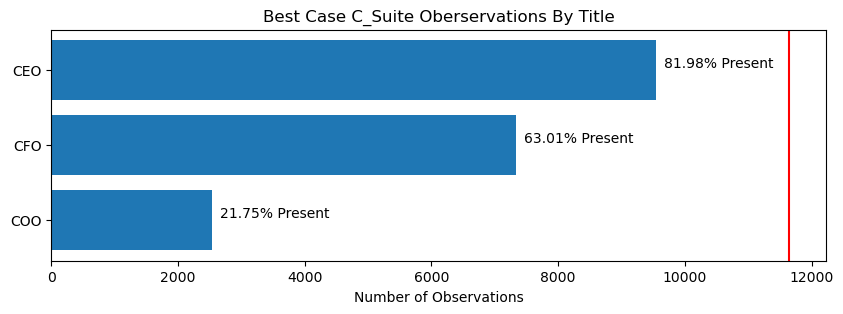

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,3))

num_ceo_observation = agg_df["reduced_ceo"].sum()
num_coo_observation = agg_df["reduced_coo"].sum()
num_cfo_observation = agg_df["reduced_cfo"].sum()
num_ceo_percent = num_ceo_observation / total_optimal_observation
num_coo_percent = num_coo_observation / total_optimal_observation
num_cfo_percent = num_cfo_observation / total_optimal_observation

text_values = [num_ceo_percent, num_cfo_percent, num_coo_percent]
position_sums = [num_ceo_observation, num_cfo_observation, num_coo_observation]
positions = ["CEO", "CFO", "COO"]
y_pos = np.arange(len(positions))

for i in range(len(text_values)):
    
    ax.annotate('{}% Present'.format(100* round(text_values[i], 4)),
                xy=(position_sums[i], y_pos[i]),
                xytext=(45, 0),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.barh(y_pos, position_sums, align='center')
plt.axvline(x = total_optimal_observation, color = 'red', label = 'axvline - full height')
ax.set_yticks(y_pos)
ax.set_yticklabels(positions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Observations')
ax.set_title('Best Case C_Suite Oberservations By Title')
plt.show()

### Percentages For the 16 year period (2005-Present), total number of c-suite members by category and year

In [22]:
subset_df.head()

YearOfReport Ticker  DirectorID TimeOfReport  BoardID  \
0          2005   NVLS       59002   2005-12-01    22593   
1          2005   NVDA      271578   2006-01-01    22806   
2          2005   NVDA       83377   2006-01-01    22806   
3          2005    NUE      206389   2005-12-01    22688   
4          2005    NWL       39111   2005-12-01    22048   

                                           BoardName    DirectorName  \
0           NOVELLUS SYSTEMS INC (De-listed 06/2012)       Rick Hill   
1                                        NVIDIA CORP  Marvin Burkett   
2                                        NVIDIA CORP    Jensen Huang   
3                                         NUCOR CORP   Terry Lisenby   
4  NEWELL BRANDS INC (Newell Rubbermaid Inc prior...    Pat Robinson   

                     RoleName  TimeBrd  TimeRole  TimeInCo  NoQuals  \
0                Chairman/CEO     12.0       9.6      12.0        2   
1                         CFO      NaN       3.4       3.4        2   
2               President/CEO     12.8      12.8      12.8        2   
3  Executive VP/CFO/Treasurer      NaN       5.9      19.9        0   
4                      VP/CFO      NaN       1.1       4.6        3   

   Succession  Attrition  RemChgeLast  STDEVAge  NetworkSize  GenderRatio  \
0         0.4        0.0        -0.43       7.4       2358.0        0.889   
1         0.5        NaN         5.20       7.5        721.0        1.000   
2         0.5        NaN         5.92       7.5       2238.0        1.000   
3         0.2        0.0         0.04       3.5        152.0        0.857   
4         0.3        0.1         0.06       6.2       1156.0        0.800   

   NationalityMix  NumberDirectors  TotalCompensation  TotalDirectComp  \
0             0.0              9.0             1623.0           1661.0   
1             0.0              9.0              761.0            761.0   
2             0.0              9.0             1763.0           1763.0   
3             0.0              7.0             1343.0           1346.0   
4             0.0             10.0             1049.0           1132.0   

   ValTotEqHeld                           Sector TimeOfReport_Updated  \
0        1932.0          Engineering & Machinery           2005-12-01   
1        1006.0  Information Technology Hardware           2005-01-01   
2       46934.0  Information Technology Hardware           2005-01-01   
3        5093.0             Steel & Other Metals           2005-12-01   
4          21.0               Household Products           2005-12-01   

        CompanyName                   Location  IsCurrent  Primary_Sector  \
0  Novellus Systems                        NaN          0               0   
1            Nvidia    Santa Clara, California          1               0   
2            Nvidia    Santa Clara, California          1               0   
3             Nucor  Charlotte, North Carolina          1               0   
4     Newell Brands           Atlanta, Georgia          1               0   

   Secondary_Sector  Tertiary_Sector  IndustryExperience_Primary  \
0                 1                0                           0   
1                 1                0                           0   
2                 1                0                           0   
3                 1                0                           0   
4                 0                1                           0   

   IndustryExperience_Secondary  IndustryExperience_Tertiary   Age Gender  \
0                             6                            0  70.0      M   
1                             4                            0  79.0      M   
2                             6                            0  58.0      M   
3                             6                            0  71.0      M   
4                             0                            4  63.0      M   

  Nationality  doctorate_degree  undergraduate_degree  graduate_degree  \
0    American             

In [48]:
count_ceo = subset_df.groupby(['YearOfReport', 'Ticker'])['CEO_Label'].sum().reset_index()
count_ceo.columns = ['YearOfReport', 'Ticker', 'count_CEOs']
count_ceo["reduced_ceo"] = np.where(count_ceo["count_CEOs"] > 1, 1, count_ceo["count_CEOs"])
count_ceo = count_ceo.groupby('YearOfReport')['reduced_ceo'].sum().reset_index()

In [50]:
count_coo = subset_df.groupby(['YearOfReport', 'Ticker'])['COO_Label'].sum().reset_index()
count_coo.columns = ['YearOfReport', 'Ticker', 'count_COOs']
count_coo["reduced_coo"] = np.where(count_coo["count_COOs"] > 1, 1, count_coo["count_COOs"])
count_coo = count_coo.groupby('YearOfReport')['reduced_coo'].sum().reset_index()

In [51]:
count_cfo = subset_df.groupby(['YearOfReport', 'Ticker'])['CFO_Label'].sum().reset_index()
count_cfo.columns = ['YearOfReport', 'Ticker', 'count_CFOs']
count_cfo["reduced_cfo"] = np.where(count_cfo["count_CFOs"] > 1, 1, count_cfo["count_CFOs"])
count_cfo = count_cfo.groupby('YearOfReport')['reduced_cfo'].sum().reset_index()

In [56]:
plot_df = count_ceo.merge(count_coo, on=['YearOfReport'], how='inner')
plot_df = plot_df.merge(count_cfo, on=['YearOfReport'], how='inner')
plot_df = plot_df[['YearOfReport', 'reduced_ceo', 'reduced_coo', 'reduced_cfo']].copy()

In [90]:
plot_df['YearOfReport'] = plot_df['YearOfReport'].astype(str)
plot_df['total_number_of_companies'] = 722

In [139]:
plot_df['ceo_perc'] = round(plot_df['reduced_ceo'] / plot_df.total_number_of_companies, 4) * 100
plot_df['coo_perc'] = round(plot_df['reduced_coo'] / plot_df.total_number_of_companies, 4) * 100
plot_df['cfo_perc'] = round(plot_df['reduced_cfo'] / plot_df.total_number_of_companies, 4) * 100

In [140]:
plot_df.head(10)

YearOfReport  reduced_ceo  reduced_coo  reduced_cfo  \
0         2005          583          174          393   
1         2006          575          170          434   
2         2007          584          184          464   
3         2008          589          169          450   
4         2009          594          170          455   
5         2010          599          151          415   
6         2011          594          145          417   
7         2012          586          151          420   
8         2013          613          143          438   
9         2014          617          151          468   

   total_number_of_companies  ceo_perc  coo_perc  cfo_perc  
0                        722     80.75     24.10     54.43  
1                        722     79.64     23.55     60.11  
2                        722     80.89     25.48     64.27  
3                        722     81.58     23.41     62.33  
4                        722     82.27     23.55     63.02  
5                        722     82.96     20.91     57.48  
6                        722     82.27     20.08     57.76  
7                        722     81.16     20.91     58.17  
8                        722     84.90     19.81     60.66  
9                        722     85.46     20.91     64.82

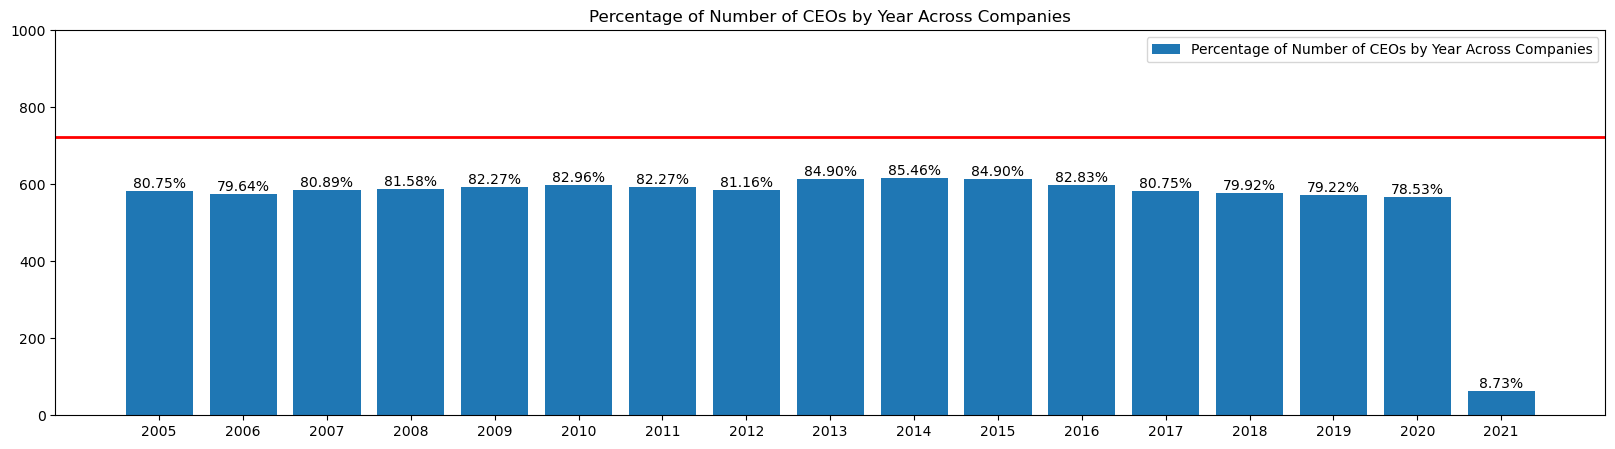

In [142]:
plt.figure(figsize=(20,5))
plt.bar(plot_df.YearOfReport, plot_df.reduced_ceo, label='Percentage of Number of CEOs by Year Across Companies')
plt.axhline(linewidth=2, color='r', y=722)

for i in range(len(plot_df.YearOfReport)):    
    plt.annotate('{:,.2f}%'.format(plot_df.ceo_perc[i]),
                xy=(plot_df.YearOfReport[i], plot_df.reduced_ceo[i]),
                #xytext=(45, 0),  # 3 points vertical offset
                #textcoords="offset points",
                ha='center', va='bottom'
                )
    
plt.ylim(0, 1000)
plt.title('Percentage of Number of CEOs by Year Across Companies')
plt.legend()
plt.show()

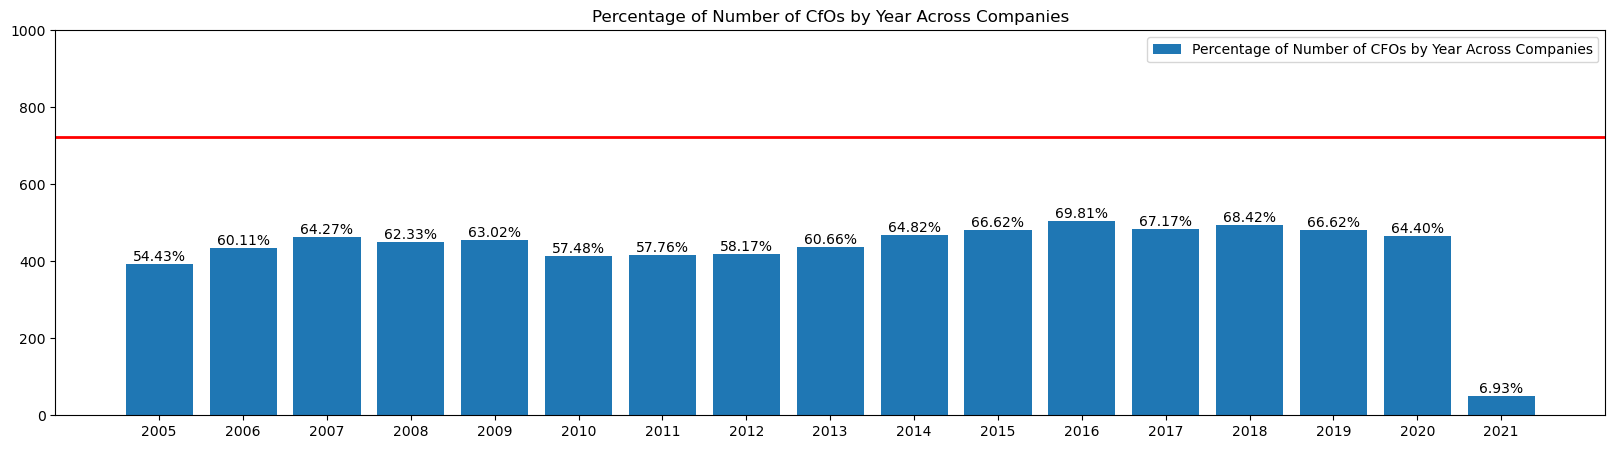

In [144]:
plt.figure(figsize=(20,5))
plt.bar(plot_df.YearOfReport, plot_df.reduced_cfo, label='Percentage of Number of CFOs by Year Across Companies')
plt.axhline(linewidth=2, color='r', y=722)

for i in range(len(plot_df.YearOfReport)):    
    plt.annotate('{:,.2f}%'.format(plot_df.cfo_perc[i]),
                xy=(plot_df.YearOfReport[i], plot_df.reduced_cfo[i]),
                #xytext=(45, 0),  # 3 points vertical offset
                #textcoords="offset points",
                ha='center', va='bottom'
                )
    
plt.ylim(0, 1000)
plt.title('Percentage of Number of CfOs by Year Across Companies')
plt.legend()
plt.show()

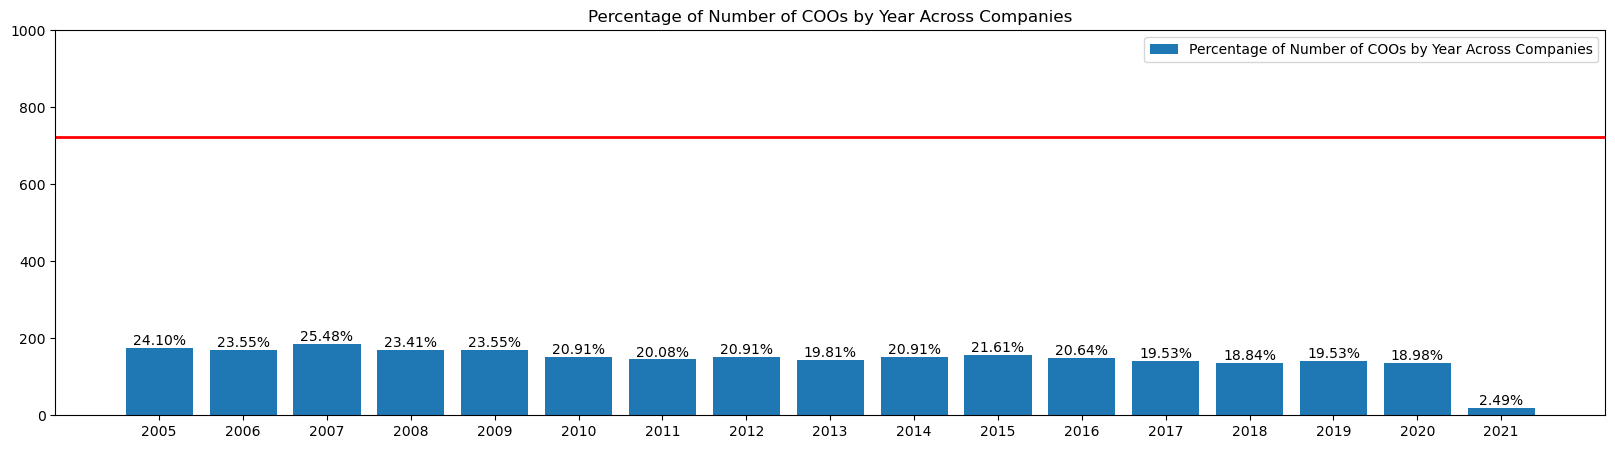

In [146]:
plt.figure(figsize=(20,5))
plt.bar(plot_df.YearOfReport, plot_df.reduced_coo, label='Percentage of Number of COOs by Year Across Companies')
plt.axhline(linewidth=2, color='r', y=722)

for i in range(len(plot_df.YearOfReport)):    
    plt.annotate('{:,.2f}%'.format(plot_df.coo_perc[i]),
                xy=(plot_df.YearOfReport[i], plot_df.reduced_coo[i]),
                #xytext=(45, 0),  # 3 points vertical offset
                #textcoords="offset points",
                ha='center', va='bottom'
                )
    
plt.ylim(0, 1000)
plt.title('Percentage of Number of COOs by Year Across Companies')
plt.legend()
plt.show()

### Percentages For the 16 year period (2005-Present), total number of c-suite members within each category. (Validation)

In [151]:
plot_df.head()

YearOfReport  reduced_ceo  reduced_coo  reduced_cfo  \
0         2005          583          174          393   
1         2006          575          170          434   
2         2007          584          184          464   
3         2008          589          169          450   
4         2009          594          170          455   

   total_number_of_companies  ceo_perc  coo_perc  cfo_perc  
0                        722     80.75     24.10     54.43  
1                        722     79.64     23.55     60.11  
2                        722     80.89     25.48     64.27  
3                        722     81.58     23.41     62.33  
4                        722     82.27     23.55     63.02

In [156]:
total_ceos_across_years_and_companies = plot_df.reduced_ceo.sum()
total_coos_across_years_and_companies = plot_df.reduced_coo.sum()
total_cfos_across_years_and_companies = plot_df.reduced_cfo.sum()

In [157]:
total_ceos_across_years_and_companies

9507

In [158]:
total_coos_across_years_and_companies

2486

In [159]:
total_cfos_across_years_and_companies

7314

In [163]:
categories = ['CEO', 'COO', 'CFO']
values = [total_ceos_across_years_and_companies, total_coos_across_years_and_companies, total_cfos_across_years_and_companies]
magic_number = 11552

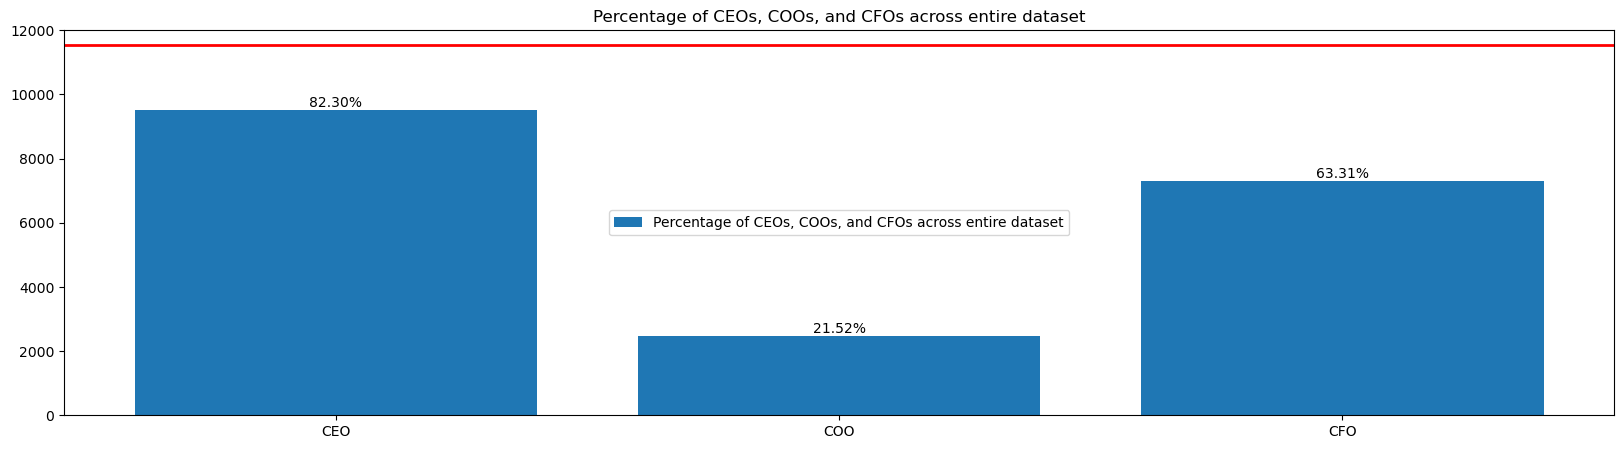

In [165]:
plt.figure(figsize=(20,5))
plt.bar(categories, values, label='Percentage of CEOs, COOs, and CFOs across entire dataset')
plt.axhline(linewidth=2, color='r', y=magic_number)

for i in range(len(categories)):    
    plt.annotate('{:,.2f}%'.format(100*values[i]/magic_number),
                xy=(categories[i], values[i]),
                #xytext=(45, 0),  # 3 points vertical offset
                #textcoords="offset points",
                ha='center', va='bottom'
                )
    
plt.ylim(0, 12000)
plt.title('Percentage of CEOs, COOs, and CFOs across entire dataset')
plt.legend()
plt.show()